<a href="https://colab.research.google.com/github/BradBKaiBuffs/Capstone/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bradley Kai

---


CIDM 6395
FA 2025
Assignment 2

I have learned a lot during my time spent with the Data Management courses. I steadily grew more confident as my foundation in applying what I learned through assignments from both courses. I am the most confident in the following areas:

# Areas I am most confident in



*   Entity Relation Models: I received exposure in designing Entity Relationship diagrams to model relational schemas and provided logical data representation. While course material introduced and covered the information I needed to execute assignments, I found it helpful to reinforce it with websites like https://www.geeksforgeeks.org/dbms/introduction-of-er-model/#. This made it possible to create a chen diagram and crows foot shown below:



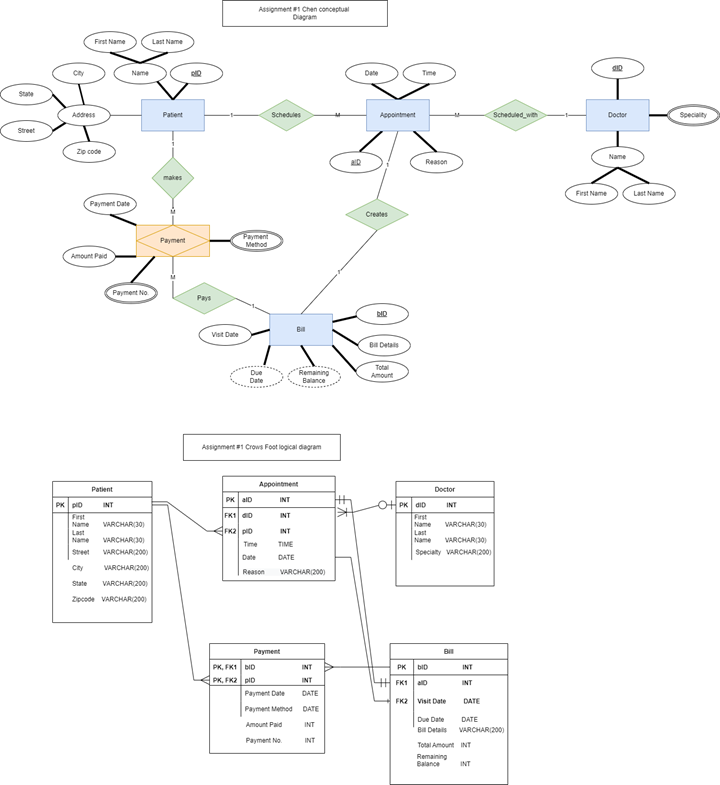



*   SQL Data Definition Language (DDL) & Data Manipulation Language (DML) Queries: I gain proficiency in writing DDL statements to create and modify database structures. In addition, I utilized DML queries for joins, subqueries, aggregations and conditional logic to complete my assignments. Once again, I leveraged https://www.geeksforgeeks.org/dbms/difference-between-ddl-and-dml-in-dbms/ for a deeper understanding of the differences and aspects of DDL and DML. Due to this research, my group and I were able to create deliverables like below:



In [ ]:
-- Schema created by Team Alpha: Ashley Morgan, Brenda Sherlock, Richard Sullivan and Bradley Kai

-- disable FK checks
/*!40014 SET @OLD_FOREIGN_KEY_CHECKS=@@FOREIGN_KEY_CHECKS, FOREIGN_KEY_CHECKS=0 */;

-- named schema xyztutility
CREATE SCHEMA IF NOT EXISTS xyzutility;
USE xyzutility;

-- Customers table
CREATE TABLE IF NOT EXISTS Customers (
	Customer_ID		int			 NOT NULL,
	Customer_Name  	varchar(30)  DEFAULT NULL,
	PRIMARY KEY (Customer_ID)
  );

-- Contract table
CREATE TABLE IF NOT EXISTS Contract (
	Contract_No				int			NOT NULL,
	Meter_No				int			NOT NULL,
    Customer_ID				int			NOT NULL,
	Activation_Date			date		NOT NULL,
    -- set default deactivation date to 12/31/9999
    -- assumes this default date means active account
	Deactivation_date		date,
	Initial_Meter_Reading	int,
	Rate					int,
	Customer_Type			varchar(30),
	PRIMARY KEY (Contract_No)
  );

-- Meter table
CREATE TABLE IF NOT EXISTS Meter (
	Meter_No			int				NOT NULL,
	Address				varchar(100)	NOT NULL,
	PRIMARY KEY (Meter_No)
  );

-- Employee table
CREATE TABLE IF NOT EXISTS Employee (
	Employee_No		int				NOT NULL,
	Employee_Name	varchar(30),
	Job				varchar(30),
	PRIMARY KEY (Employee_No)
);

-- Readings table
CREATE TABLE IF NOT EXISTS Readings (
	Read_ID			int		NOT NULL,
	Read_Date		date	NOT NULL,
	Employee_No		int		NOT NULL,
	Meter_No		int		NOT NULL,
	Meter_Reading	int		DEFAULT NULL,
	PRIMARY KEY (Read_ID)
);

-- Bill table
CREATE TABLE IF NOT EXISTS Bill (
	Bill_No					int		NOT NULL,
	Contract_No				int		NOT NULL,
	Customer_ID				int		NOT NULL,
    Current_Read_ID			int		NOT NULL,
    Previous_Read_ID		int		NOT NULL,
	Consumption				int,
	Bill_Date				date,
	Total					decimal(10,2),
	Balance					decimal(10,2),
	Due_Date				date,
	PRIMARY KEY (Bill_No)
  );

-- Payment table
CREATE TABLE IF NOT EXISTS Payment (
	Payment_ID				int				NOT NULL,
	Bill_No					int				NOT NULL,
	Payment_Amount			decimal(10,2),
	Payment_Date			date,
	Payment_Method			varchar(30),
	PRIMARY KEY (Payment_ID)
  );

-- Add foreign keys
ALTER TABLE Contract
	ADD CONSTRAINT fk2_Contract_Meter_No FOREIGN KEY (Meter_No)
    REFERENCES Meter (Meter_No);

ALTER TABLE Contract
    ADD CONSTRAINT fk1Contract_Customer_ID FOREIGN KEY (Customer_ID)
    REFERENCES Customers (Customer_ID);

ALTER TABLE Assignment
	ADD CONSTRAINT fk1_Assignment_Meter_No FOREIGN KEY (Meter_No)
    REFERENCES Meter (Meter_No);

ALTER TABLE Readings
	ADD CONSTRAINT fk1_Readings_Employee_No FOREIGN KEY (Employee_No)
    REFERENCES Employee (Employee_No);

ALTER TABLE Readings
	ADD CONSTRAINT fk2_Readings_Meter_No FOREIGN KEY (Meter_No)
    REFERENCES Meter (Meter_No);

ALTER TABLE Bill
	ADD CONSTRAINT fk1_Bill_Contract_ID FOREIGN KEY (Contract_No)
    REFERENCES Contract (Contract_No);

ALTER TABLE Bill
	ADD CONSTRAINT fk2_Bill_Contract_ID FOREIGN KEY (Customer_ID)
    REFERENCES Customer (Customer_ID);

ALTER TABLE Bill
	ADD CONSTRAINT fk3_Bill_Curr_Read_ID FOREIGN KEY (Current_Read_ID)
    REFERENCES Readings (Read_ID);

ALTER TABLE Bill
	ADD CONSTRAINT fk4_Bill_Prev_Read_ID FOREIGN KEY (Previous_Read_ID)
    REFERENCES Readings (Read_ID);

ALTER TABLE Payment
	ADD CONSTRAINT fk1_Payment_Bill_No FOREIGN KEY (Bill_No)
    REFERENCES Bill (Bill_No)

In [ ]:
/* draft_xyz_utility_schema and draft_insert_file must be loaded first prior to loading draft_bill_table */


-- bill data: BilLNo, Date, Consumption, Total, Balance
INSERT INTO Bill (Bill_No, Contract_No, Customer_ID, Current_Read_ID, Previous_Read_ID, Bill_Date, Consumption, Total, Balance) VALUES
	(1002, 5085, 113, 1, 2, '2020-06-06', 209, 71.06, 0),
    (1001, 3592, 454, 3, 4, '2019-05-15', 200, 98, 0),
    (1003, 3592, 454, 4, 5, '2019-06-15', 259, 126.91, 0),
    (1004, 3592, 454, 5, 8, '2019-07-15', 160, 78.4, 0),
    (1007, 2420, 454, 6, 7, '2018-10-21', 520, 202.8, 102.8),
    (2007, 4283, 856, 9, 10, '2019-11-23', 330, 135.3, 0),
    (2006, 3955, 1010, 11, 15, '2018-09-19', 131, 34.06, 34.06),
    (1005, 2795, 1125, 12, 13, '2017-12-04', 271, 102.98, 0),
    (1006, 2795, 1125, 13, 14, '2018-01-05', 278, 105.64, 0);



*   Transforming and loading for visualization: I prepared datasets for visualization tools by reshaping, aggregating and formatting data.
*   Importing and cleaning data: I leveraged Python and Pandas for data management which built my epxerience in importing, cleaning, transforming and loading data. I got more familiar with Python libraries like Pandas and NumPy.



            Date  Rented Bike Count  Hour  Temperature
0     01/12/2017                254     0         -5.2
1     01/12/2017                204     1         -5.5
2     01/12/2017                173     2         -6.0
3     01/12/2017                107     3         -6.2
4     01/12/2017                 78     4         -6.0
...          ...                ...   ...          ...
8755  30/11/2018               1003    19          4.2
8756  30/11/2018                764    20          3.4
8757  30/11/2018                694    21          2.6
8758  30/11/2018                712    22          2.1
8759  30/11/2018                584    23          1.9

[8760 rows x 4 columns]


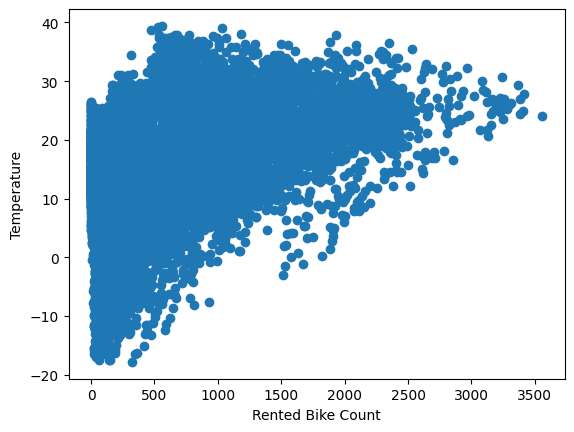

In [3]:
#import pandas
import pandas as pd
seoul_bike_data_url = 'https://raw.githubusercontent.com/sean-humpherys/randomfilestorage/main/seoulbikedata.csv'

# read csv
df = pd.read_csv(seoul_bike_data_url)

# drop columns except for Date, Rented Bike Count, Hour, Temperature(C)
df_transform = df.drop(['Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)','Seasons', 'Holiday','Functioning Day'], axis=1)

# change column name from Temperature(C) to Temperature
df_transform = df_transform.rename(columns = {'Temperature(C)':'Temperature'})
print(df_transform)

# import matplotlib.pyplot
import matplotlib.pyplot as plt
import numpy as np

# add axes
x = df_transform['Rented Bike Count']
y = df_transform['Temperature']

# scatterplot
plt.scatter(x,y)

# label x and y axes
plt.xlabel("Rented Bike Count")
plt.ylabel("Temperature")

plt.show()

# Areas I'm weak in/Need more confidence with



*   Normalization: I struggled with how to reduce redundancy and prevent update anomalies. The particular area that I need to gain more mastery in is identifying normal forms like 1NF, 2NF, 3NF and BCNF.
*   Reshaping Data in Pandas: The challenge I faced in some projects involved multidimensional thinking. I still could using more practice to build mastery in long and wide formats.
*   Joining Data: I had exposure to joining in a few assignments and some projects but still find it challenging to handle many-to-many and one-to-many relationships correctly. I think I need more practice in applying inner, outer, left and right joins correctly without fear of data loss or duplication.






# What I wish I knew


*   Data Lake Architecture: I have little to no exposure to data formats used to store data in a lake. Additionally, I would like to learn more about Data Lake and Data Warehouse, how it is used, when to use it and just general experience in hands-on applications.
*   Master Data Management: I think it would be very valuable to have a general understanding of the application of this. I think it would be very valuable have the experience in learning different approaches through application and being able to state I put into practice standards like a "Golden Record".
*   ETL automation: I'd like to learn how to create workflows that are automated. I have been exposed to the practice in production environments but I have not implemented anything like it. This also includes scheduling, monitoring and managing different tasks in the data pipeline.





# Summary statement of capabilities, competencies and preparedness

Every assignment and project that I've answered or created has required some form of modeling, transformation and querying. Data management has been a part of my process whether it is designing schemas or cleaning datasets. These skills will help me tackle real-world projects.

# Prepardness for portfolio and prototype representative project

Through my coursework experience, I believe I am prepared to apply what I learned with Data Management. My strengths in relational modeling, SQL and Python-based data coding set me up to build data systems. While I have areas to grow in, I possess the mindset and foundation to develop more as needed.

# How Data Management integrates



*   For Data Analytics: Cleaned and normalized data is mandatory for accurate analysis.
*   For Software Systems: Applications rely on well-built databases for performance and scalability.
*   For Networking and Cybersecurity: Data management helps ensure integrity, traceability and compliance.



# Data Management Statement

Data Management is like an architecture of technology where data is structured and ready to facilitate systems.